In [1]:
import numpy as np
import matplotlib.pyplot as plt
from webapp import methods as m

In [2]:
def draw_vial(vial, color):
    a = np.linspace(0, 360, 361)
    sina = np.sin(a)
    cosa = np.cos(a)
    cx, cy, r = vial
    plt.plot(cx + r * sina, cy + r * cosa, color=color)

def draw_contours(img, contours):
    plt.imshow(img)
    for c in contours:
        plt.plot(c[:, :, 0], c[:, :, 1], color = "red")

def plot_res(r):

    if r is None:
        return

    text, cx, cy, r, v_img, v_img_rot, v_img_un, v_img_bw, qr, angle = r

    plt.subplot(3, 3, (1, 4))
    plt.imshow(v_img)
    plt.title(f"angle = {angle:.1f}")
    plt.scatter(qr[0], qr[1], color = "red")
    plt.axis("off")

    plt.subplot(3, 3, (2, 5))
    plt.axis("off")
    plt.imshow(v_img_bw)
    plt.scatter(qr[0], qr[1], color = "red")

    plt.subplot(3, 3, (3, 6))
    plt.axis("off")
    plt.imshow(v_img_rot)

    plt.subplot(3, 1, 3)
    plt.imshow(v_img_un)
    plt.title(text)
    plt.axis("off")


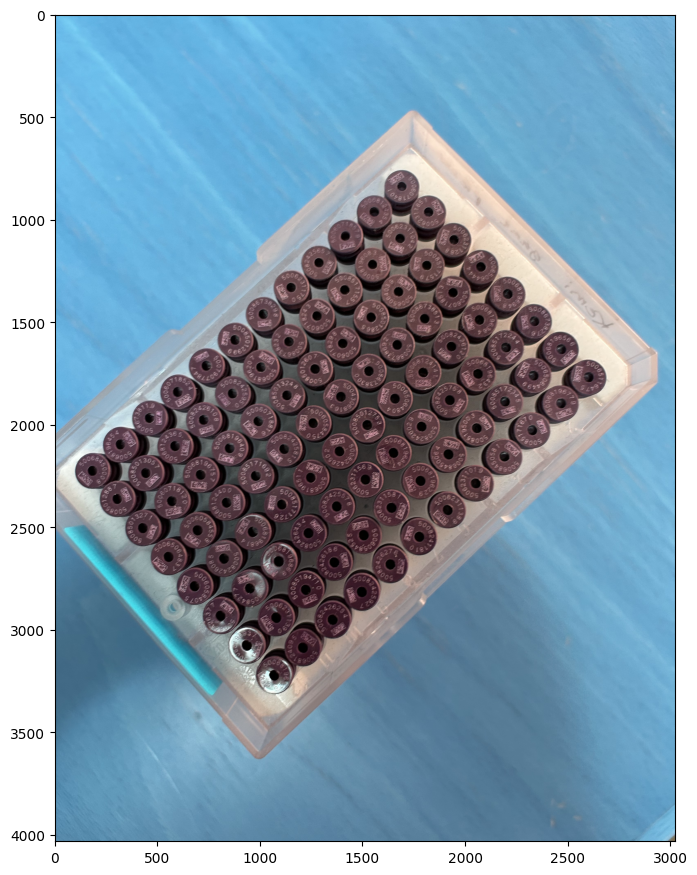

In [19]:
import cv2
img_path = "test-images/IMG_3501.jpeg"
img0 = cv2.imread(img_path)
plt.figure(figsize = (8, 16))
plt.imshow(img0)


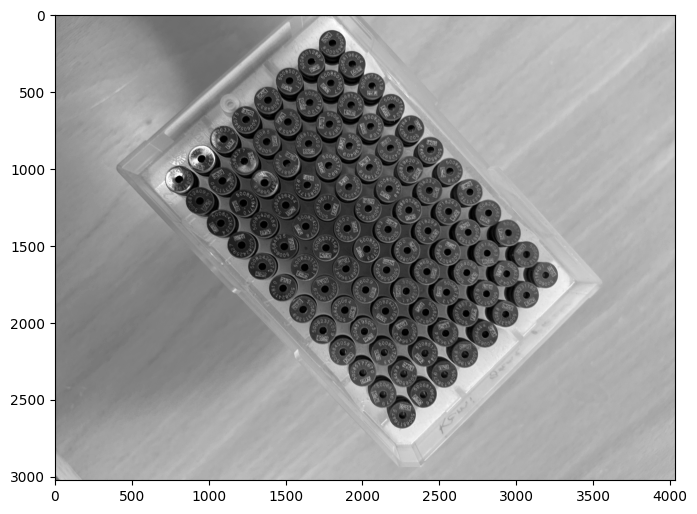

In [20]:

img1 = m.get_image(img_path)
plt.figure(figsize = (8, 15))
plt.imshow(img1, cmap = "gray")


(3878, 2550)

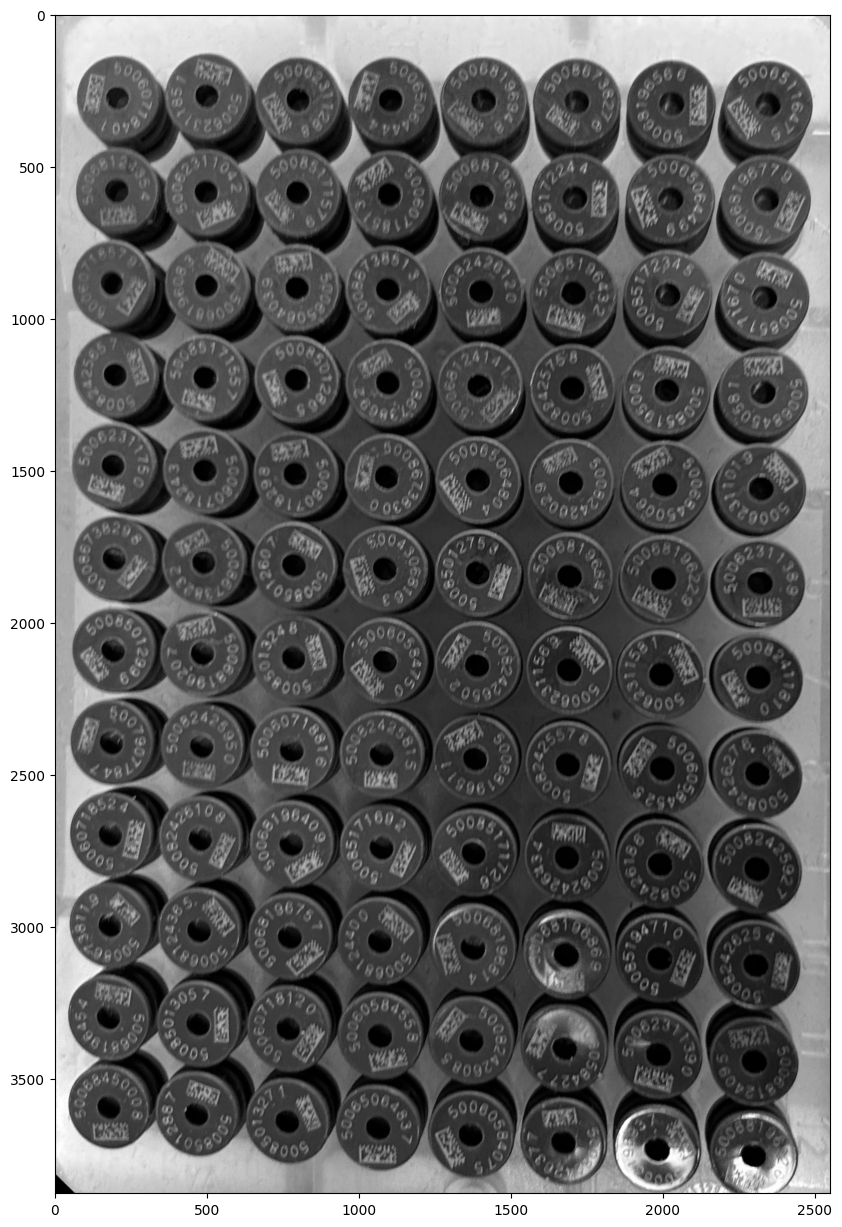

In [21]:

img2 = m.preprocess_image(img1)
plt.figure(figsize = (10, 20))
plt.imshow(img2, cmap = "gray")
img2.shape


In [22]:

vials = m.detect_vials(img2)[0]

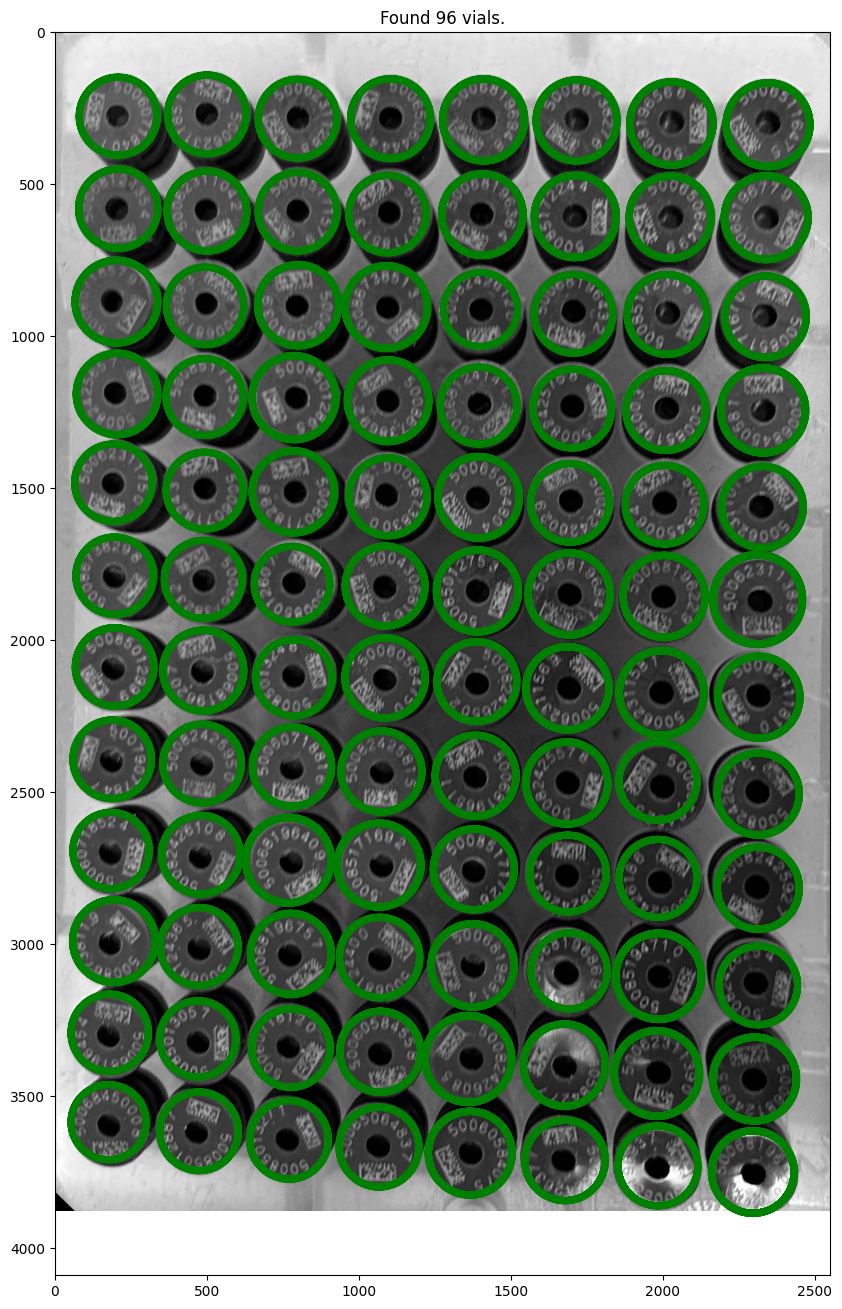

In [23]:

plt.figure(figsize = (10, 20))
plt.imshow(img2, cmap = "gray")
plt.title(f"Found {len(vials)} vials.")
res = []
for v in vials:
    r = m.get_number_on_vial(img2, v)
    draw_vial(v, "green" if r is not None else "red")
    res.append(r)

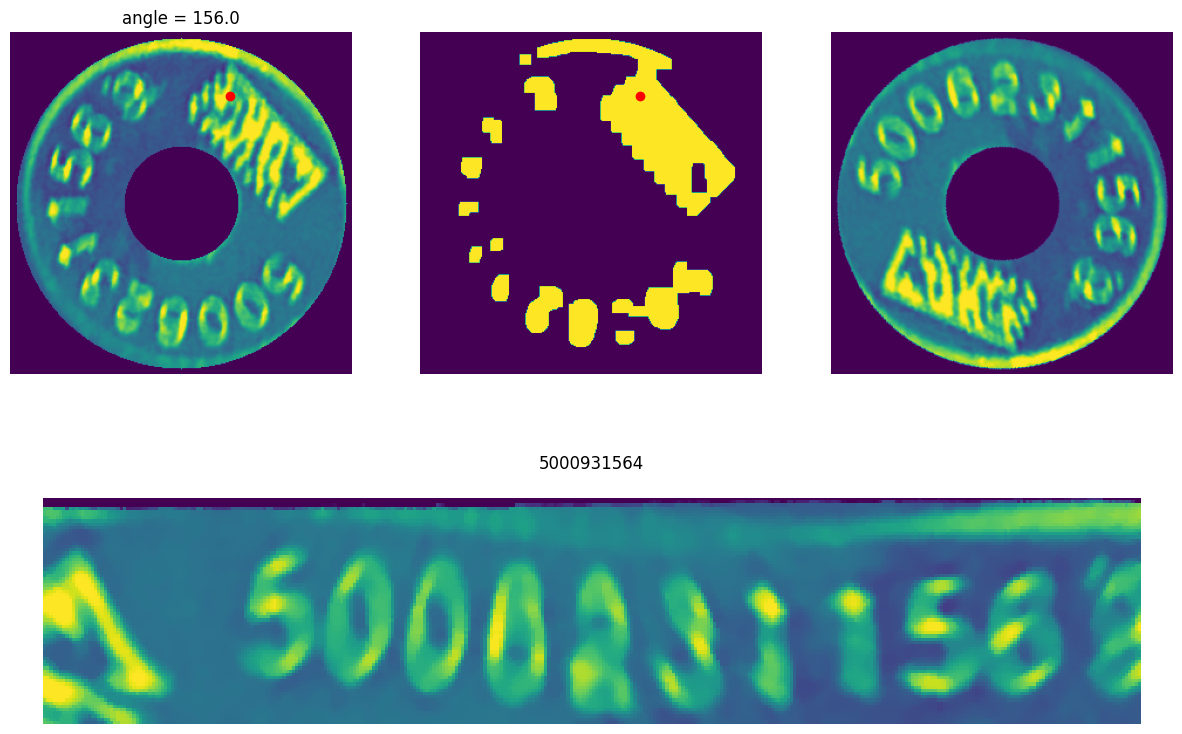

In [27]:
i = 5
plt.figure(figsize=(15, 10))
plot_res(res[i])
